#EDA

In [113]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from scipy import stats
from imblearn.over_sampling import RandomOverSampler
from scipy.stats import f_oneway
#import sys
#sys.path.append('/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/ML/Assignment_CLO1_project_base/prediksi_dropout/')
#from utils.preprocessing import Scalling


sns.set()

In [114]:
#membaca data
dataku = pd.read_csv('/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/ML/Assignment_CLO1_project_base/prediksi_dropout/data_set/data.csv',sep=";")
dataku

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [115]:
#cek data kosong
dataku.isna().sum().sum()

0

In [116]:
dataku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [117]:
dataku.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [79]:
dataku["Target"].value_counts()


Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [118]:
data_fitur = dataku.drop(columns='Target')
target = dataku["Target"]
data_fitur.var() # hitung variance

Marital status                                    3.669294e-01
Application mode                                  3.057141e+02
Application order                                 1.726052e+00
Course                                            4.258306e+06
Daytime/evening attendance\t                      9.727954e-02
Previous qualification                            1.043788e+02
Previous qualification (grade)                    1.739321e+02
Nacionality                                       4.781050e+01
Mother's qualification                            2.434594e+02
Father's qualification                            2.354110e+02
Mother's occupation                               6.979241e+02
Father's occupation                               6.382212e+02
Admission grade                                   2.097283e+02
Displaced                                         2.477161e-01
Educational special needs                         1.139771e-02
Debtor                                            1.007

In [119]:
data_fitur.cov() #hitung covariance

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Marital status,0.366929,2.796163,-0.100158,5.795644e+01,-0.051944,0.386971,-0.179000,-0.037039,1.825700,1.211508,...,0.014526,0.073019,0.051912,0.054488,-0.079875,-0.225702,0.009326,-0.032817,0.007338,-0.037130
Application mode,2.796163,305.714115,-6.577986,2.359137e+03,-1.658339,75.456893,-8.997741,-0.079956,32.458212,22.340281,...,0.553591,7.998693,4.993185,11.587985,-3.770288,-10.516209,0.632391,4.149045,-0.395877,-0.902638
Application order,-0.100158,-6.577986,1.726052,1.613287e+02,0.065013,-2.473972,-1.117289,-0.203635,-1.331547,-1.013683,...,-0.028772,-0.317127,0.083314,-0.285733,0.284357,0.380063,-0.015605,-0.344442,-0.020225,0.090066
Course,57.956437,2359.136969,161.328675,4.258306e+06,-27.772916,140.275929,-2204.768494,-484.028823,1756.175315,1606.014080,...,49.205435,-355.588602,1819.572240,2271.320159,1231.987341,3749.824600,47.933902,39.322895,50.532583,-94.922742
Daytime/evening attendance\t,-0.051944,-1.658339,0.065013,-2.777292e+01,0.097280,-0.229017,0.216353,0.039962,-0.996515,-0.669460,...,0.009832,-0.066991,0.000254,0.017990,0.031990,0.082063,-0.000994,0.051491,-0.010369,0.016234
Previous qualification,0.386971,75.456893,-2.473972,1.402759e+02,-0.229017,104.378759,14.022670,-2.063730,-2.102714,-1.036787,...,0.020381,2.803553,1.260376,4.632428,-0.265864,0.050143,0.039293,3.046993,-0.900371,1.485833
Previous qualification (grade),-0.179000,-8.997741,-1.117289,-2.204768e+03,0.216353,14.022670,173.932093,4.932369,-12.484693,-7.129644,...,-0.035769,-0.467808,-0.916589,-3.194580,1.998424,3.658682,-0.189024,1.588737,0.341196,-1.575279
Nacionality,-0.037039,-0.079956,-0.203635,-4.840288e+02,0.039962,-2.063730,4.932369,47.810504,-5.388595,-9.047603,...,0.043687,-0.096550,-0.305396,-0.702124,-0.372714,-0.306152,-0.073179,-0.011982,-0.085299,0.541150
Mother's qualification,1.825700,32.458212,-1.331547,1.756175e+03,-0.996515,-2.102714,-12.484693,-5.388595,243.459423,128.113173,...,0.034316,1.280362,1.204362,1.295650,-0.698940,-2.534677,0.250580,-4.752955,1.282415,-2.962965
Father's qualification,1.211508,22.340281,-1.013683,1.606014e+03,-0.669460,-1.036787,-7.129644,-9.047603,128.113173,235.410957,...,-0.183737,1.255950,0.821445,0.576286,0.244447,-0.646239,-0.085934,-3.184119,1.222691,-2.494028


In [120]:
data_fitur.std() #hitung standard deviasi

Marital status                                       0.605747
Application mode                                    17.484682
Application order                                    1.313793
Course                                            2063.566416
Daytime/evening attendance\t                         0.311897
Previous qualification                              10.216592
Previous qualification (grade)                      13.188332
Nacionality                                          6.914514
Mother's qualification                              15.603186
Father's qualification                              15.343108
Mother's occupation                                 26.418253
Father's occupation                                 25.263040
Admission grade                                     14.482001
Displaced                                            0.497711
Educational special needs                            0.106760
Debtor                                               0.317480
Tuition 

In [11]:
over = RandomOverSampler()
data_fitur,target = over.fit_resample(data_fitur,target)
data_fitur["Target"]=target


In [121]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(sampling_strategy='majority')
data_fitur,target = under.fit_resample(data_fitur,target)

In [122]:
data_fitur["Target"]=target

In [123]:
data_fitur

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout
12,1,1,2,9853,1,1,133.0,1,19,37,...,0,6,0,0,0.000000,0,12.7,3.7,-1.70,Dropout
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,1,18,1,9238,1,1,122.0,1,38,38,...,0,6,8,6,12.000000,0,11.1,0.6,2.02,Graduate
1130,1,1,3,9500,1,1,145.0,1,19,37,...,0,8,8,8,13.058750,0,9.4,-0.8,-3.12,Graduate
2414,1,43,2,9147,1,1,130.0,1,34,37,...,4,10,16,10,11.181818,3,7.6,2.6,0.32,Graduate
2379,1,1,1,9130,1,1,133.0,1,2,37,...,0,6,8,6,12.500000,0,12.4,0.5,1.79,Graduate


In [126]:
data_fitur["Target"].value_counts()

Target
Dropout     1421
Enrolled     794
Graduate     794
Name: count, dtype: int64

In [127]:
target = data_fitur[data_fitur.columns[-1]]
data_fitur = data_fitur[data_fitur.columns[:-1]]

In [128]:
def box_plot(data): #fungsi boxplot
    sns.set(rc={'figure.figsize':(38,10)})
    melted_data = pd.melt(data, value_vars=data.columns[:-1], var_name="variabel", value_name="value")
    ax = sns.boxplot(x="variabel",y="value",data=melted_data)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()

/tmp/ipykernel_3391/1637873670.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/ML/Assignment_CLO1_project_base/prediksi_dropout/.env/lib64/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


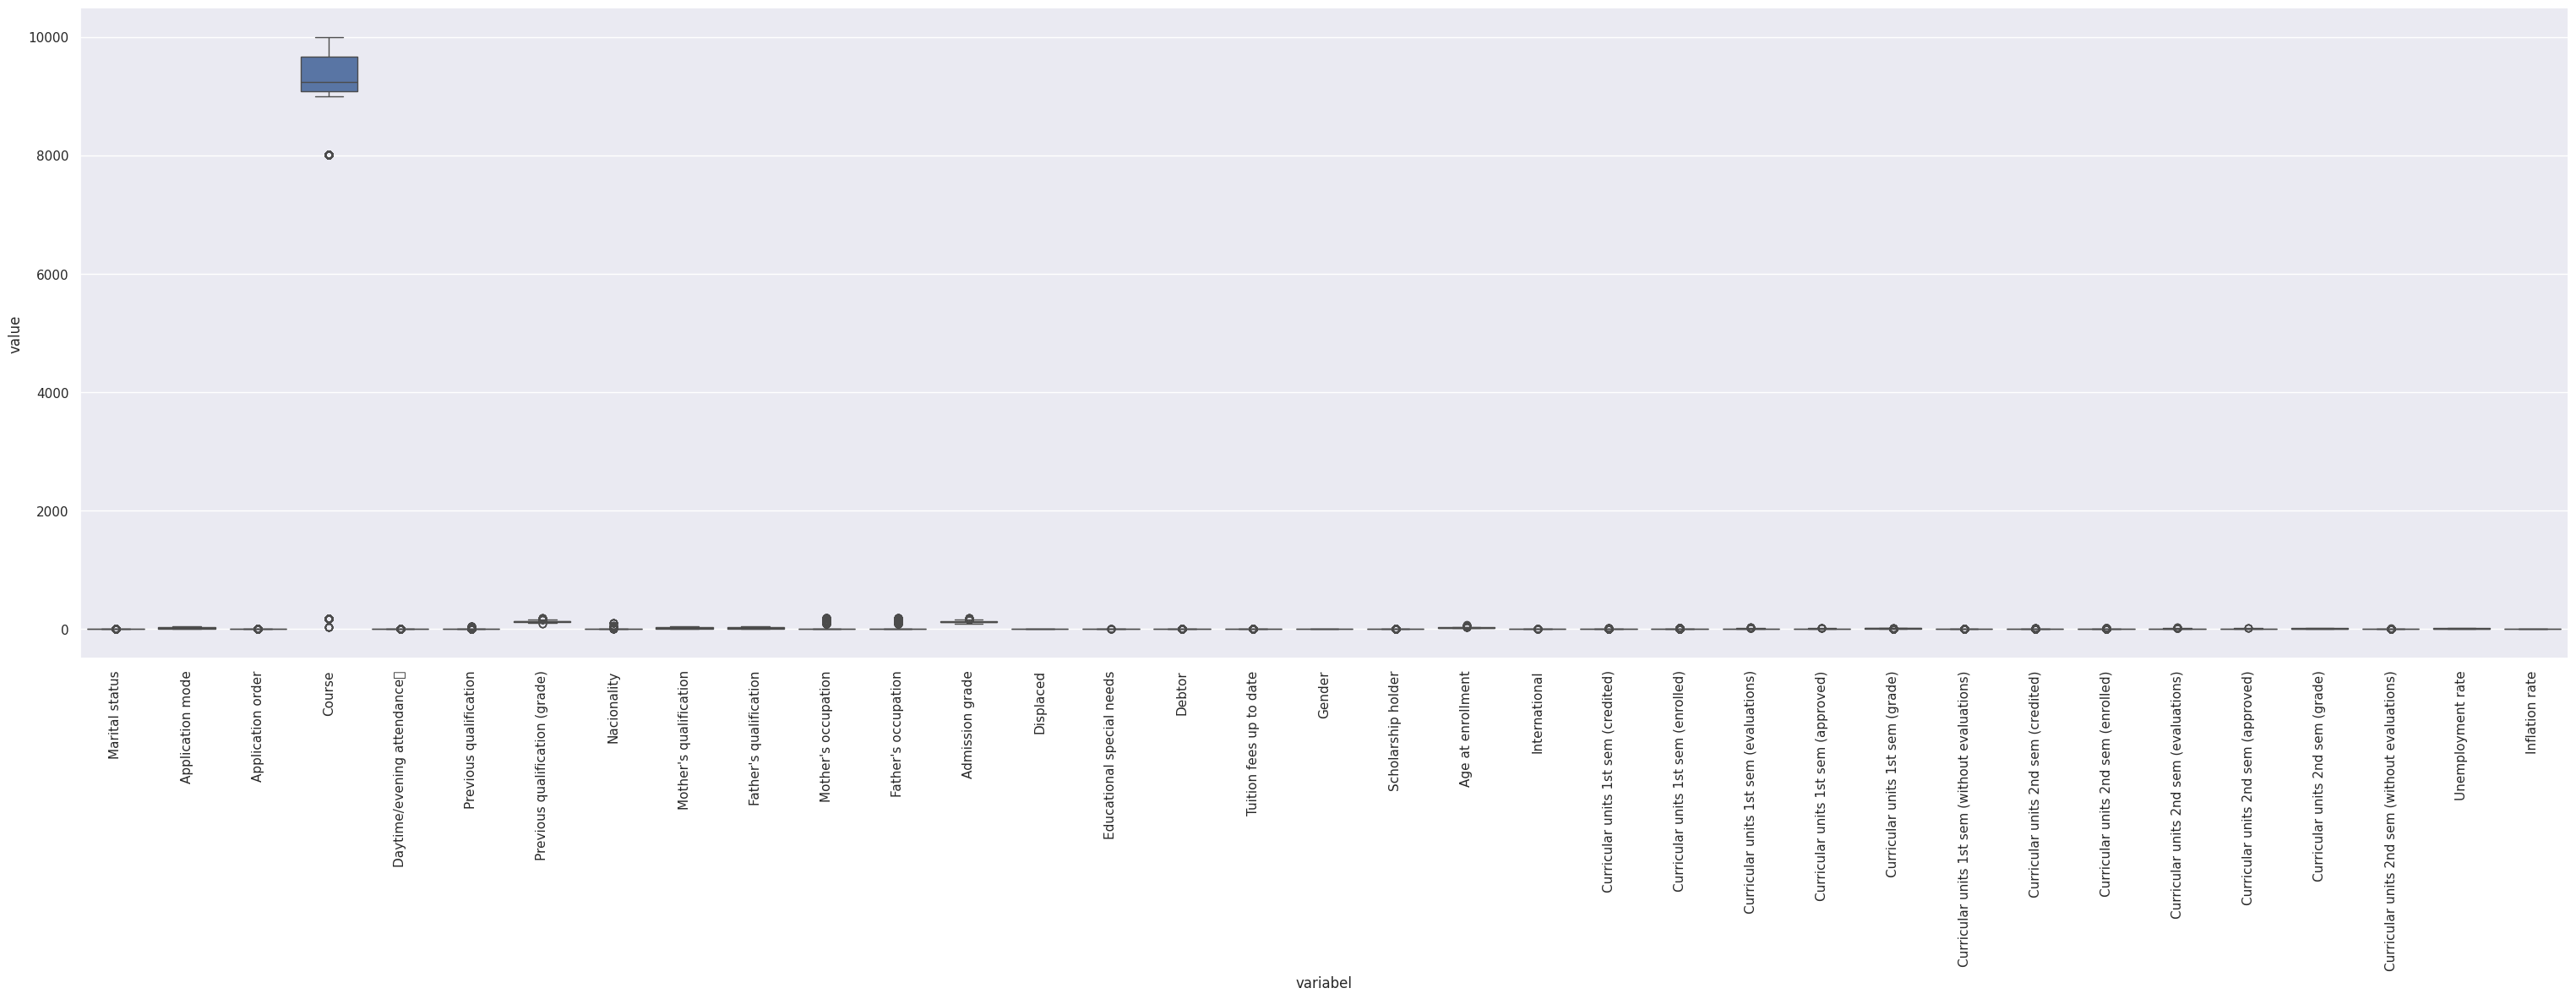

In [129]:
box_plot(data_fitur)

In [131]:
def distribusi(data):
    
    num_kolom = len(data.columns)
    num_rows = (num_kolom + 4)//5
    num_rows = min(15, num_rows)

    fig,axes = plt.subplots(num_rows, 5, figsize=(30, 20))
    
    for i, kolom in enumerate(data.columns):
        row = i //5
        col = i % 5
        sns.histplot(data[kolom], kde=True, ax=axes[row, col])
        #axes[row,col].set_title(kolom)
    
    for i in range(num_kolom, num_rows * 5):
        row = i // 5
        col = i % 5
        fig.delaxes(axes[row, col])
    
    fig.suptitle('Distribusi untuk Setiap Kolom', y=1.02)


    plt.tight_layout()
    plt.show()

/tmp/ipykernel_3391/2940113894.py:23: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/ML/Assignment_CLO1_project_base/prediksi_dropout/.env/lib64/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


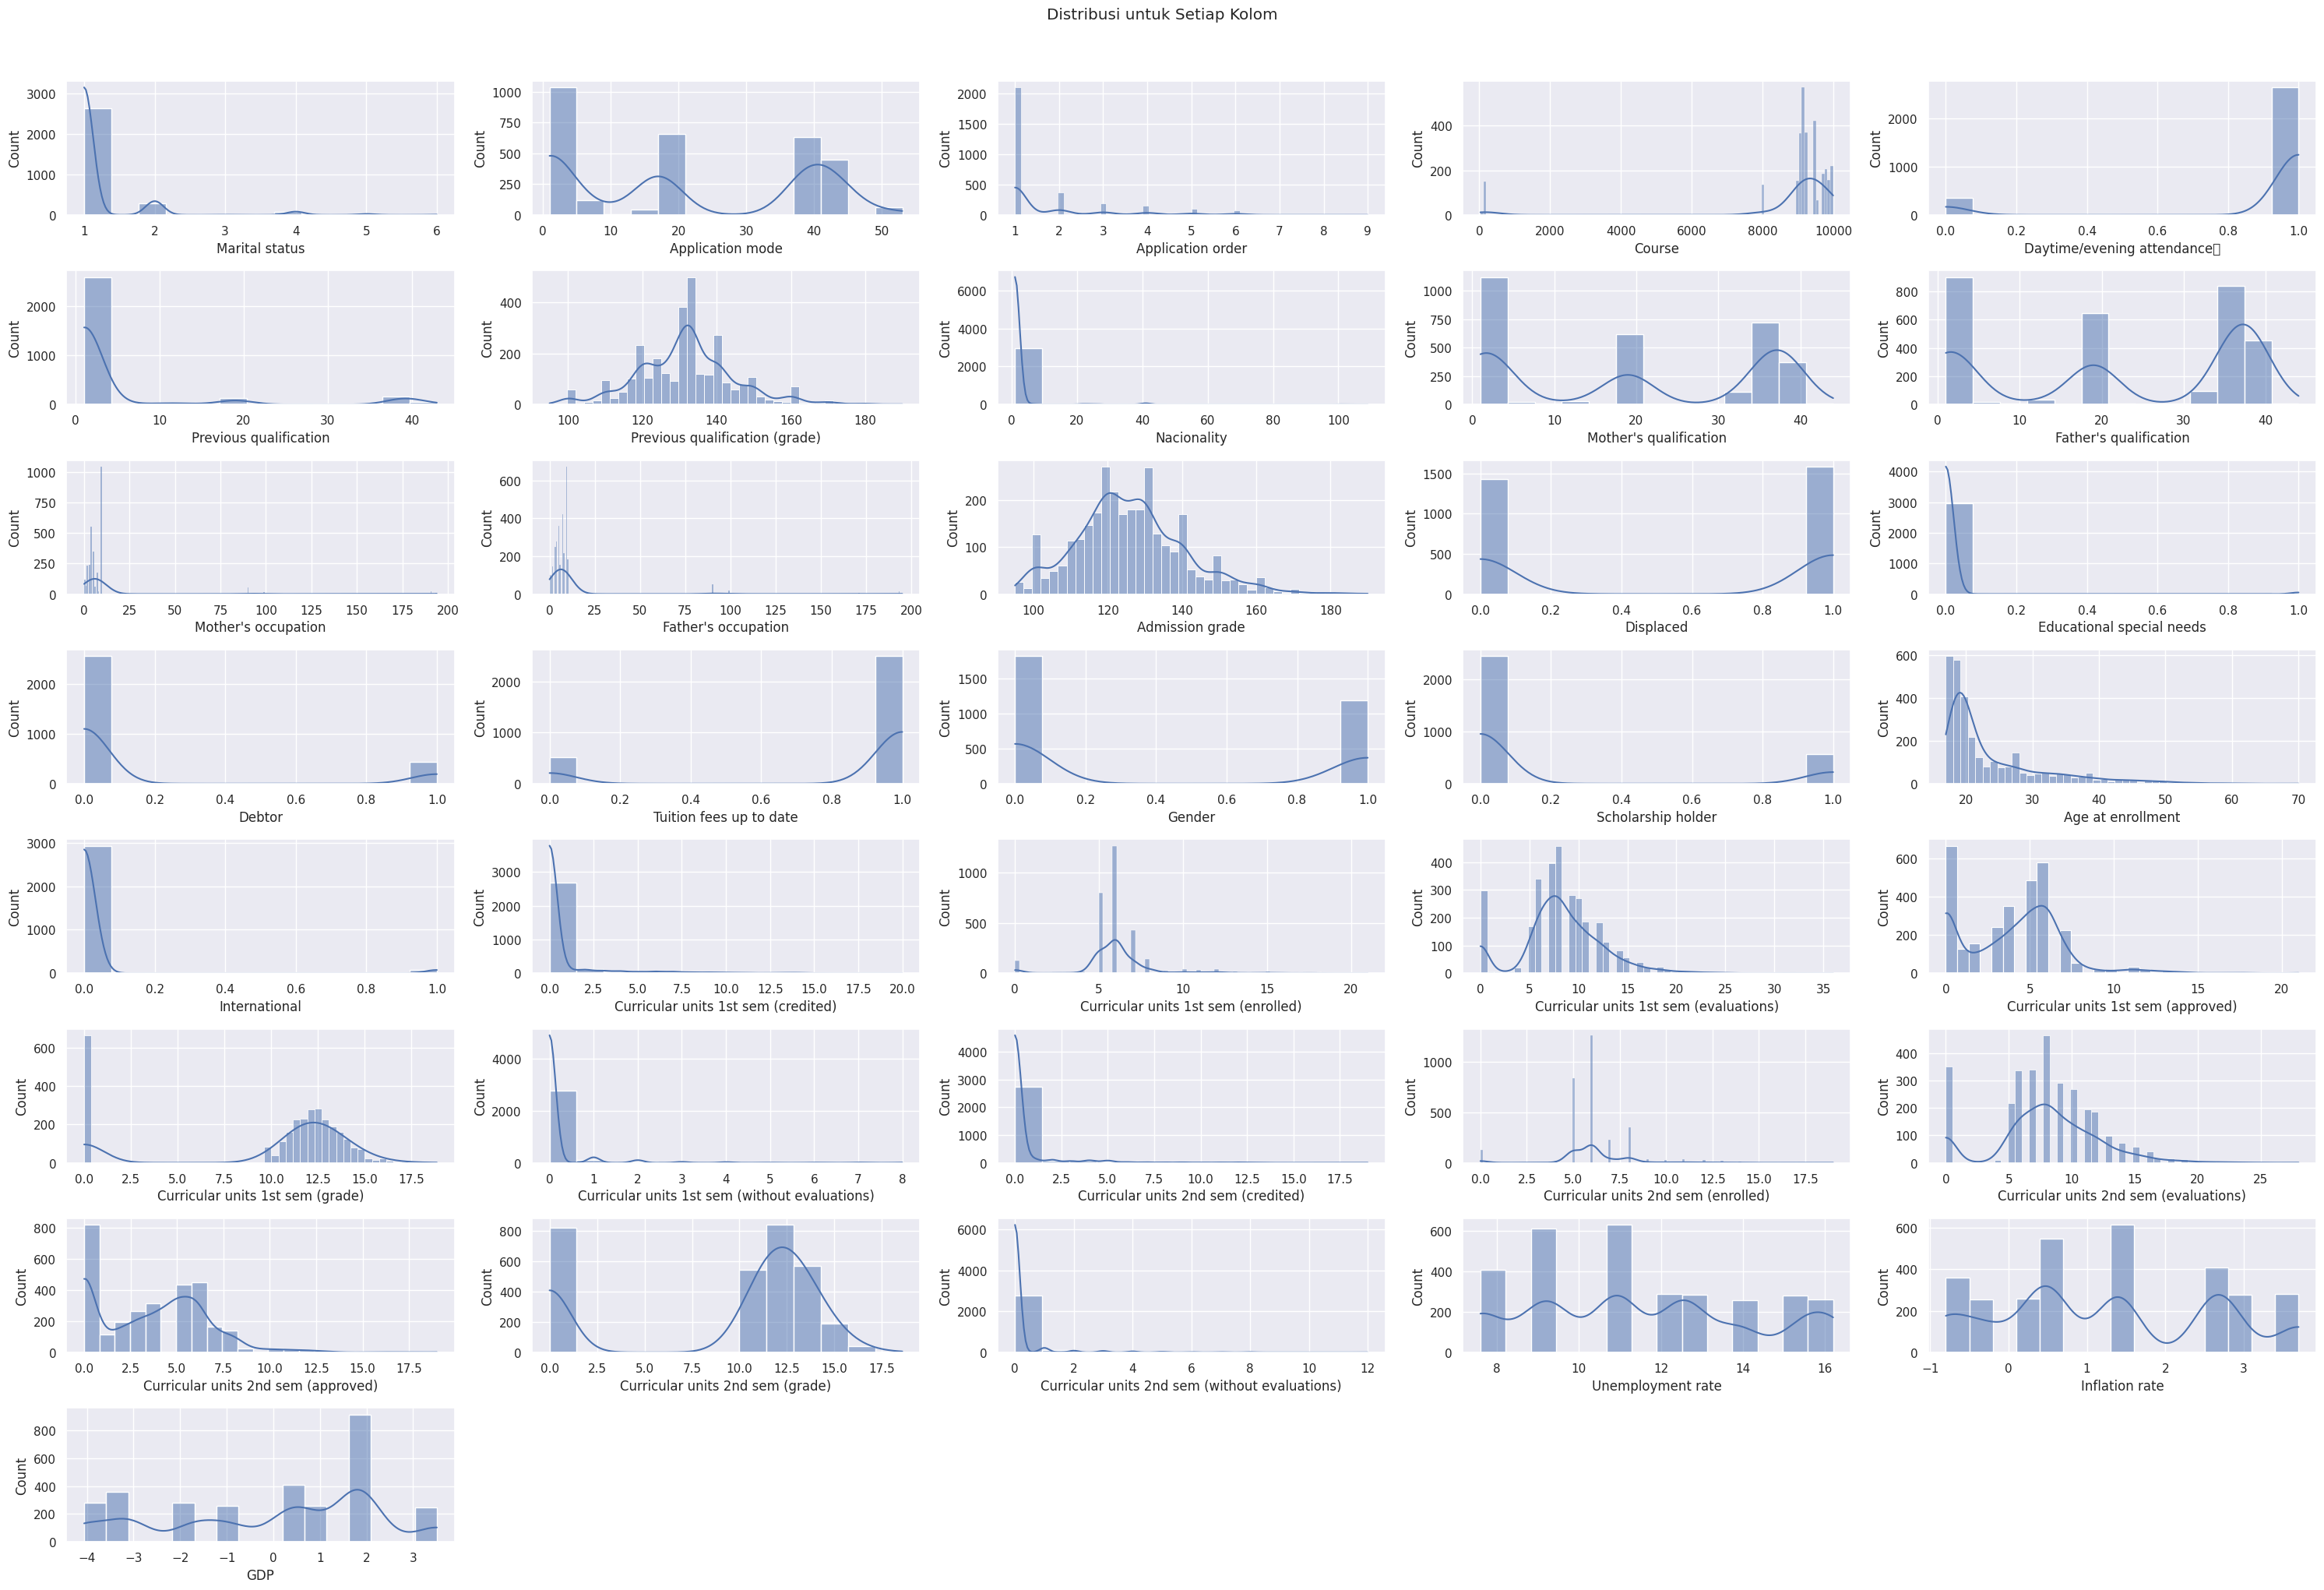

In [132]:
distribusi(data_fitur)

In [134]:
def scatter(data):
    num_kolom = len(data.columns)
    num_rows = (num_kolom + 4)//5
    num_rows = min(15, num_rows)

    fig,axes = plt.subplots(num_rows, 5, figsize=(30, 20))
    
    for i, kolom in enumerate(data.columns):
        row = i //5
        col = i % 5
        sns.scatterplot(x=data[kolom],y=data["Target"], data= data, ax=axes[row, col])
        #axes[row,col].set_title(kolom)
    
    for i in range(num_kolom, num_rows * 5):
        row = i // 5
        col = i % 5
        fig.delaxes(axes[row, col])
    
    fig.suptitle('Distribusi untuk Setiap Kolom', y=1.02)


    plt.tight_layout()
    plt.show()

/tmp/ipykernel_3391/556954052.py:22: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/ML/Assignment_CLO1_project_base/prediksi_dropout/.env/lib64/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


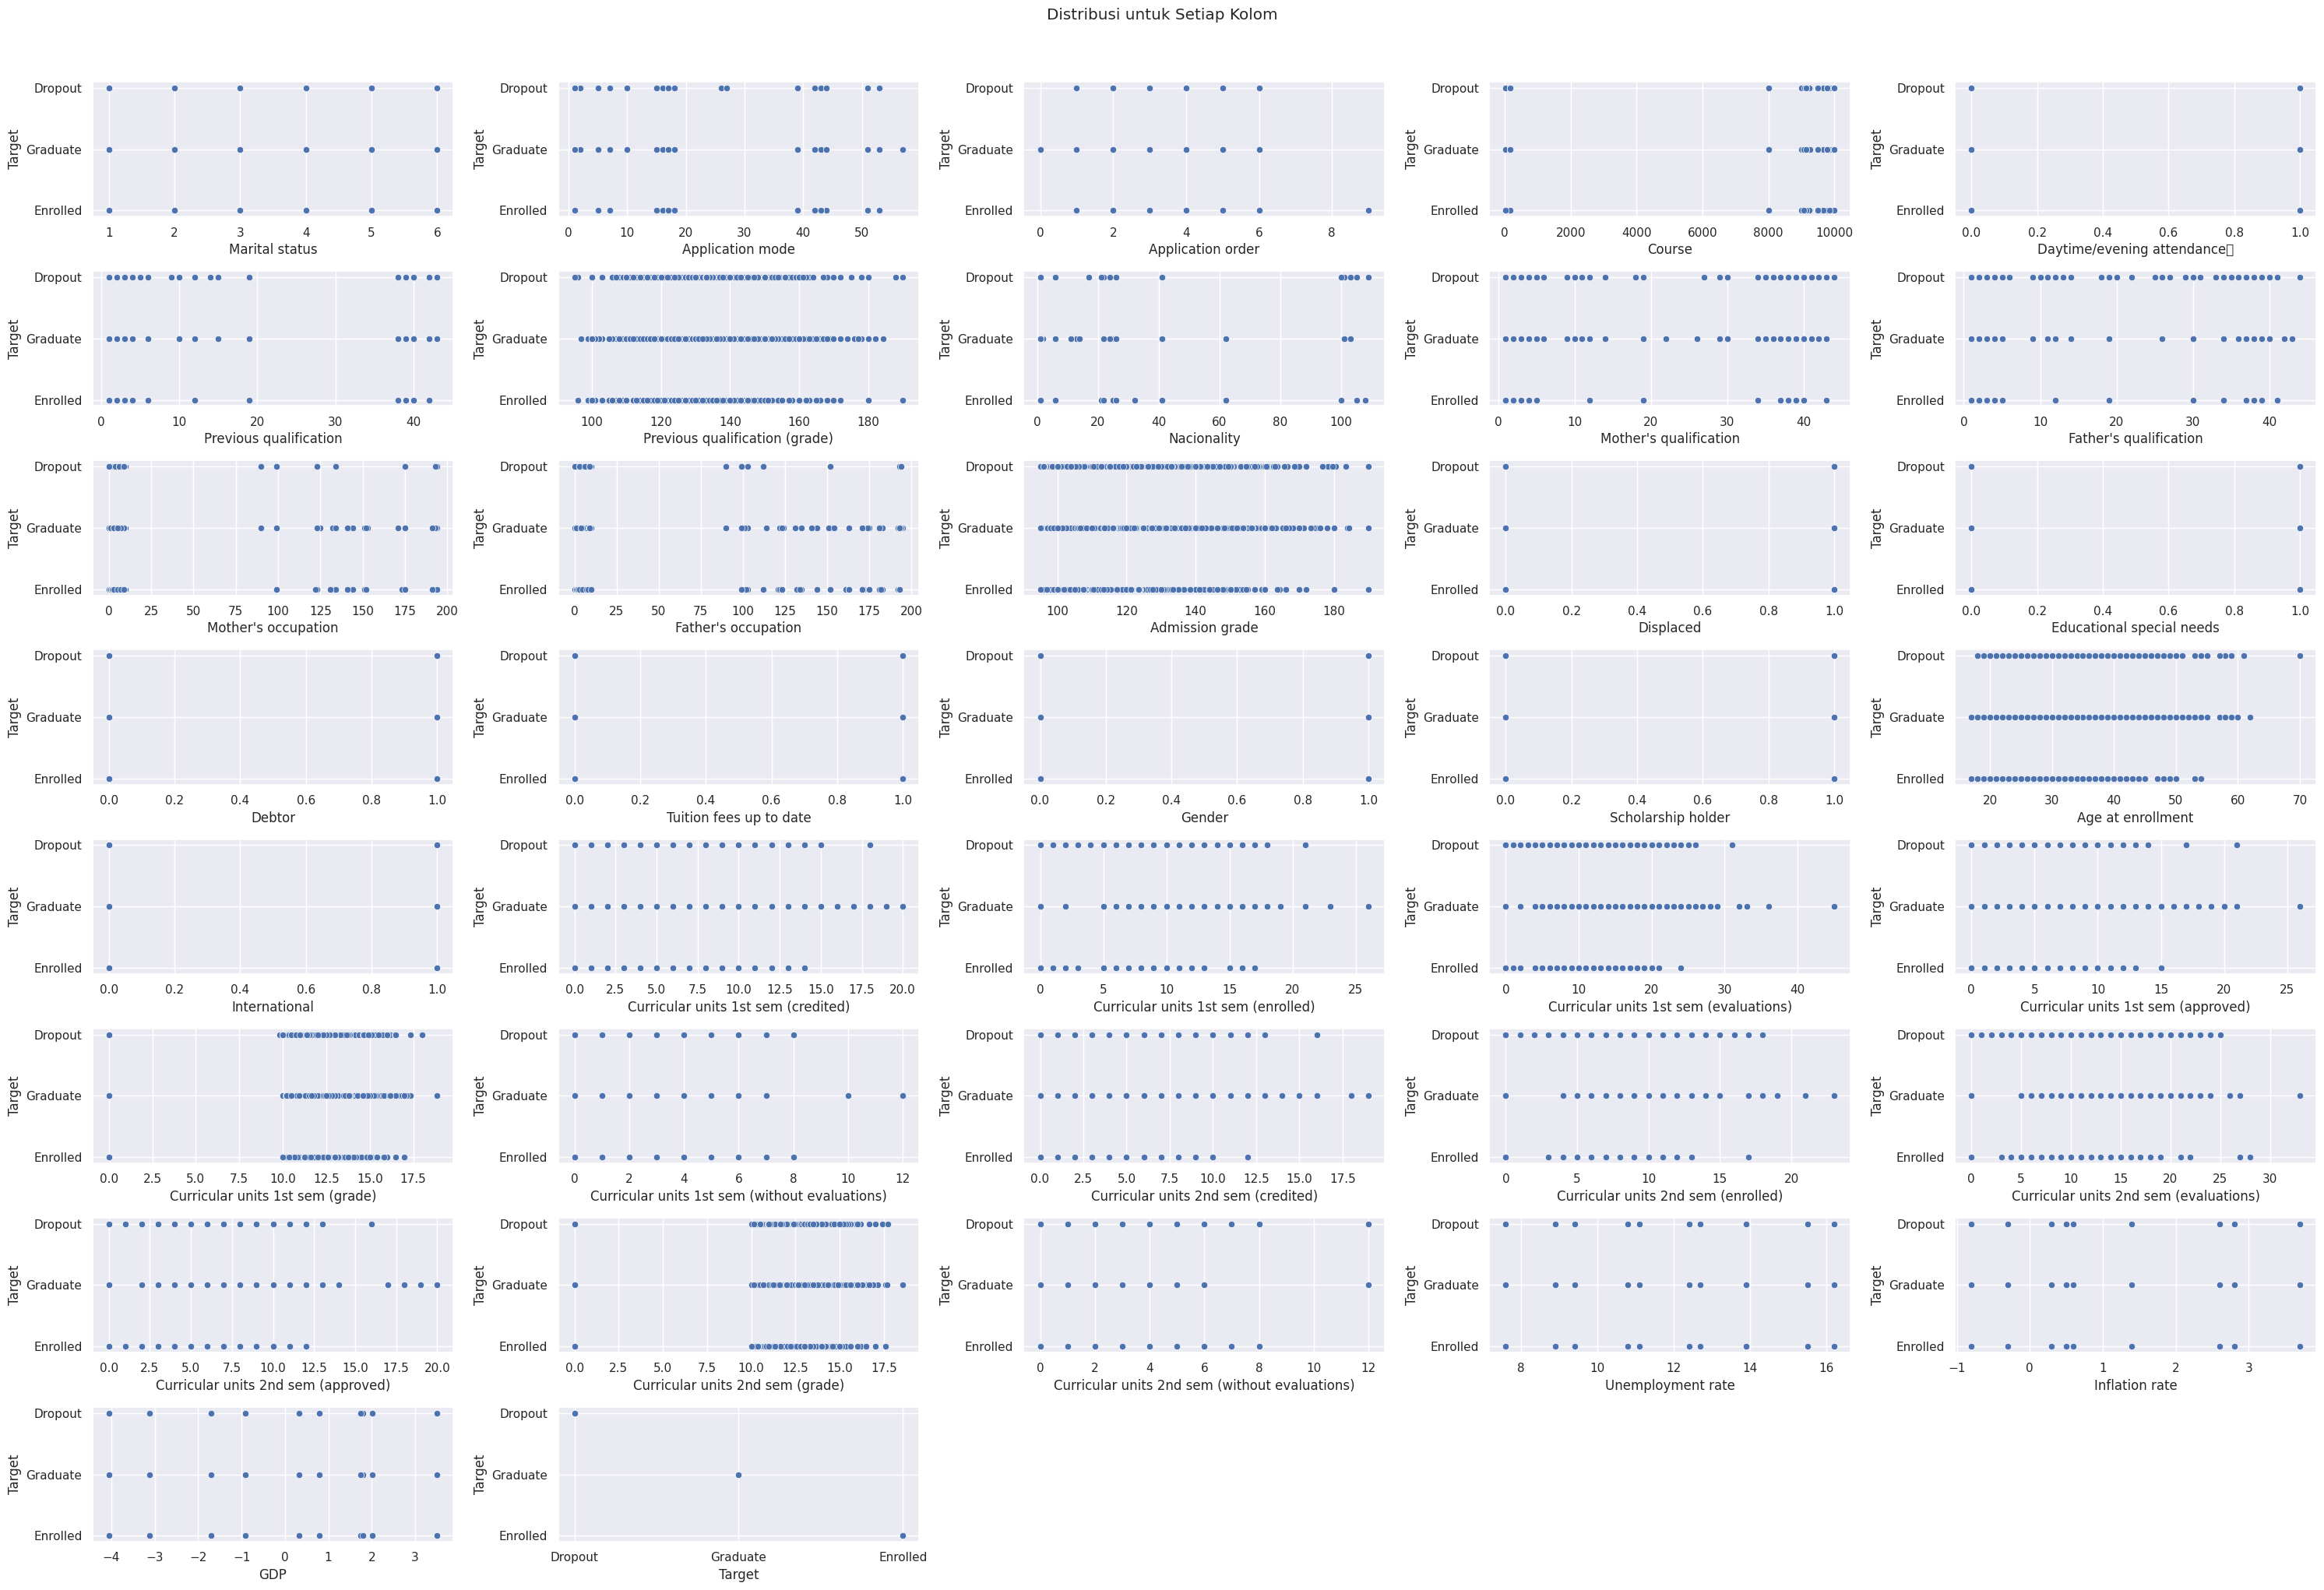

In [135]:
scatter(dataku)

In [136]:
data_ = data_fitur.copy()
data_["Target"] = target
dictio_korelasi = {}
for kolom in data_.columns[:-1]:
    if kolom not in ["Daytime/evening attendance","Displaced","Educational special needs","Debtor","Tuition fees up to date","Gender","Scholarship holder","International"]:
        group = [data_[kolom][data_["Target"]==value] for value in data_["Target"].unique()]
        f_statistic, p_value = f_oneway(*group)
    
        dictio_korelasi[kolom]= p_value

dictio_korelasi

{'Marital status': 6.542036719668822e-07,
 'Application mode': 2.830878718759174e-29,
 'Application order': 4.785101356836691e-07,
 'Course': 0.041656965182314404,
 'Daytime/evening attendance\t': 6.215833976159016e-05,
 'Previous qualification': 0.021185303778364112,
 'Previous qualification (grade)': 1.1574752431546977e-06,
 'Nacionality': 0.48643048595636496,
 "Mother's qualification": 3.5531129181211575e-06,
 "Father's qualification": 0.03520019691666835,
 "Mother's occupation": 0.00047224355542566245,
 "Father's occupation": 0.0010399834017457683,
 'Admission grade': 5.187574188343808e-08,
 'Age at enrollment': 4.766490715958152e-48,
 'Curricular units 1st sem (credited)': 0.037179868648838967,
 'Curricular units 1st sem (enrolled)': 4.2036313903129685e-15,
 'Curricular units 1st sem (evaluations)': 1.748680136582943e-16,
 'Curricular units 1st sem (approved)': 4.6928583345902926e-191,
 'Curricular units 1st sem (grade)': 4.464756400367658e-148,
 'Curricular units 1st sem (without

In [137]:
from scipy.stats import pointbiserialr

for i in ["Daytime/evening attendance\t","Displaced","Educational special needs","Debtor","Tuition fees up to date","Gender","Scholarship holder","International"]:
    dictio_korelasi[i] = pointbiserialr(data_[i],data_["Target"].map( {
    "Dropout":0,
    "Graduate":1,
    "Enrolled":2
})).pvalue
dictio_korelasi

{'Marital status': 6.542036719668822e-07,
 'Application mode': 2.830878718759174e-29,
 'Application order': 4.785101356836691e-07,
 'Course': 0.041656965182314404,
 'Daytime/evening attendance\t': 8.690462399834814e-05,
 'Previous qualification': 0.021185303778364112,
 'Previous qualification (grade)': 1.1574752431546977e-06,
 'Nacionality': 0.48643048595636496,
 "Mother's qualification": 3.5531129181211575e-06,
 "Father's qualification": 0.03520019691666835,
 "Mother's occupation": 0.00047224355542566245,
 "Father's occupation": 0.0010399834017457683,
 'Admission grade': 5.187574188343808e-08,
 'Age at enrollment': 4.766490715958152e-48,
 'Curricular units 1st sem (credited)': 0.037179868648838967,
 'Curricular units 1st sem (enrolled)': 4.2036313903129685e-15,
 'Curricular units 1st sem (evaluations)': 1.748680136582943e-16,
 'Curricular units 1st sem (approved)': 4.6928583345902926e-191,
 'Curricular units 1st sem (grade)': 4.464756400367658e-148,
 'Curricular units 1st sem (without

In [138]:
#drop kolom
kolom_drop = ["Educational special needs", "International","Nacionality",'Inflation rate','Unemployment rate','GDP','Previous qualification','Course']
data_fitur = data_fitur.drop(columns=kolom_drop)


In [139]:
data_fitur["Target"] = target

In [140]:
data_fitur["Target"].isna().sum()

0

In [141]:
z = np.abs(stats.zscore(data_fitur[data_fitur.columns[:-1]]))
z

,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,...,Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations)
0,0.310059,0.189894,2.610347,0.366316,0.756217,0.042005,0.653704,0.233757,0.094976,0.083939,...,1.948345,1.327341,1.827456,0.220431,0.275438,2.926341,1.921166,1.229886,1.598433,0.215048
2,0.310059,1.096955,2.610347,0.366316,0.756217,1.107606,0.972019,0.088783,0.094976,0.087473,...,1.948345,1.327341,1.827456,0.220431,0.275438,0.020282,1.921166,1.229886,1.598433,0.215048
7,0.310059,0.133203,1.824265,0.366316,0.985541,1.107606,0.972019,0.088783,0.094976,0.889678,...,0.772633,1.327341,1.827456,0.220431,0.275438,0.504625,0.721981,1.229886,1.598433,0.215048
9,0.310059,1.096955,0.533982,0.366316,0.466843,1.191616,0.198501,0.270000,0.170143,0.210889,...,0.167937,0.342378,0.318161,0.220431,0.275438,0.020282,1.436550,0.548353,0.777250,0.215048
12,0.310059,1.096955,0.252100,0.366316,0.084637,0.042005,0.972019,0.270000,0.094976,0.282776,...,0.537491,1.327341,1.827456,0.220431,0.275438,0.020282,1.921166,1.229886,1.598433,0.215048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,0.310059,0.133203,0.533982,0.366316,0.756217,1.171473,1.037048,0.088783,0.170143,0.779975,...,0.167937,0.676322,0.211507,0.220431,0.275438,0.020282,0.002471,0.814715,0.513285,0.215048
1130,0.310059,1.096955,1.038182,0.366316,1.001932,0.042005,0.972019,0.161270,0.170143,1.057555,...,0.067206,1.344210,0.630357,0.220431,0.275438,0.948405,0.002471,1.496249,0.699600,0.215048
2414,0.310059,1.284080,0.252100,0.366316,0.144687,0.916004,0.972019,0.088783,0.094976,0.519430,...,2.519361,1.344210,0.360508,1.224615,2.106153,1.917091,1.916224,2.177782,0.369304,3.447659
2379,0.310059,1.096955,0.533982,0.366316,0.084637,1.127749,0.972019,0.088783,0.170143,0.025765,...,0.302348,0.676322,0.713406,0.220431,0.275438,0.020282,0.002471,0.814715,0.601273,0.215048


In [68]:
data_fitur["Target"] = target

In [142]:
data_fitur["Target"].isna().sum()

0

In [143]:
#kick outlier zscores <5

z = np.abs(stats.zscore(data_fitur[data_fitur.columns[:-1]]))
data_fitur = data_fitur[(z<5).all(axis=1)]
len(data_fitur)


2841

In [144]:
data_fitur["Target"].isna().sum()

0

In [145]:
data_fitur

,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target
0,1,17,5,1,122.0,19,12,5,9,127.3,...,0,0.000000,0,0,0,0,0,0.000000,0,Dropout
2,1,1,5,1,122.0,37,37,9,9,124.8,...,0,0.000000,0,0,6,0,0,0.000000,0,Dropout
7,1,18,4,1,119.0,37,37,9,9,113.1,...,0,0.000000,0,0,5,5,0,0.000000,0,Dropout
9,1,1,1,1,138.0,1,19,4,7,123.0,...,5,11.400000,0,0,6,14,2,13.500000,0,Dropout
12,1,1,2,1,133.0,19,37,4,9,130.2,...,0,0.000000,0,0,6,0,0,0.000000,0,Dropout
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,1,18,1,1,122.0,38,38,9,7,114.7,...,6,10.833333,0,0,6,8,6,12.000000,0,Graduate
1130,1,1,3,1,145.0,19,37,7,7,141.5,...,8,13.058750,0,0,8,8,8,13.058750,0,Graduate
2414,1,43,2,1,130.0,34,37,9,9,118.5,...,8,11.625000,1,4,10,16,10,11.181818,3,Graduate
2379,1,1,1,1,133.0,2,37,9,7,125.7,...,6,13.500000,0,0,6,8,6,12.500000,0,Graduate


/tmp/ipykernel_3391/1637873670.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/ML/Assignment_CLO1_project_base/prediksi_dropout/.env/lib64/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


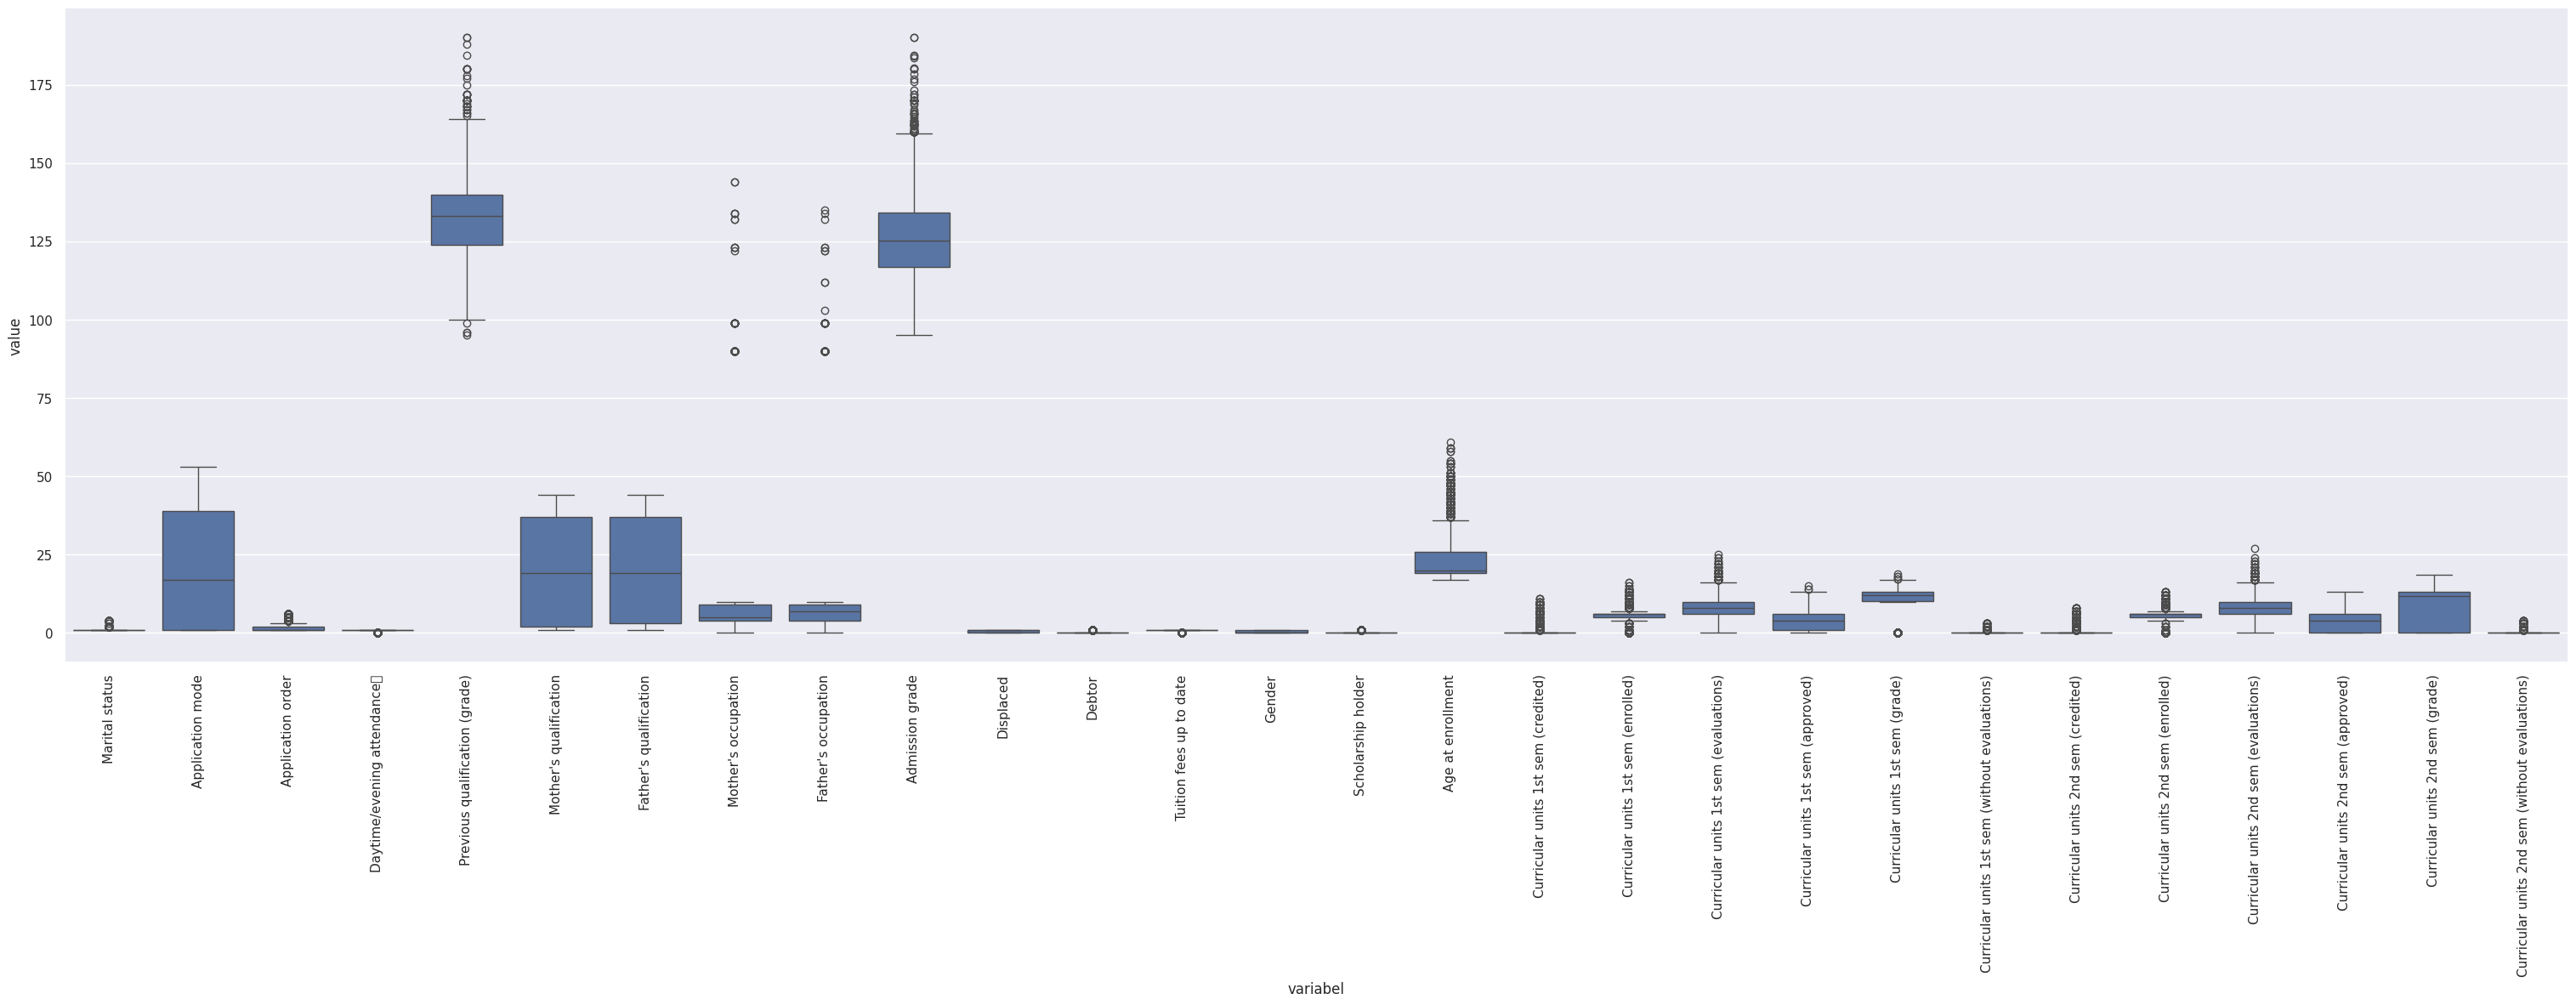

In [146]:
box_plot(data_fitur)

In [29]:
#scall = Scalling(data_fitur)
#data_fitur_standard = scall.standarisasi(data_fitur.columns)
#data_fitur_nomral = scall.normalisasi(data_fitur.columns)
#data_fitur_standard
data_fitur = data_fitur.drop(columns="Course")

In [147]:
def data_logaritma(data):
    datas = data.copy()
    for i in datas.columns:
        datas[i] = np.log(datas[i])

    return datas


In [30]:
#data_fitur = data_logaritma(data_fitur)

In [31]:
#distribusi(data_fitur)

In [32]:
#data_scaled = data_fitur.to_numpy()

In [148]:
scaler = StandardScaler()
norm = MinMaxScaler()
target = data_fitur.Target
data_fitur = data_fitur[data_fitur.columns[:-1]]
data_scaled = scaler.fit_transform(data_fitur)
data_norm = norm.fit_transform(data_fitur)
data_scaled

array([[-0.30924126, -0.17146828,  2.59301339, ..., -1.27539274,
        -1.60383858, -0.21000835],
       [-0.30924126, -1.08158763,  2.59301339, ..., -1.27539274,
        -1.60383858, -0.21000835],
       [-0.30924126, -0.11458582,  1.80939983, ..., -1.27539274,
        -1.60383858, -0.21000835],
       ...,
       [-0.30924126,  1.30747566,  0.24217272, ...,  2.33860165,
         0.36377463,  5.79637143],
       [-0.30924126, -1.08158763, -0.54144083, ...,  0.89300389,
         0.59572903, -0.21000835],
       [-0.30924126, -1.08158763, -0.54144083, ...,  0.89300389,
         0.74236687, -0.21000835]])

Index(['Marital status', 'Application mode', 'Application order',
       'Daytime/evening attendance\t', 'Previous qualification (grade)',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender',
       'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)'],
      dtype='object')

In [153]:
#data_fitur_standard
data_n_pca = pd.DataFrame(data=data_scaled, columns=data_fitur.columns)
#data_n_pca["Target"] = target
data_n_pca.to_csv("data_n_pca.csv", index = False)



In [154]:
data_n_pca


,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,...,Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations)
0,-0.309241,-0.171468,2.593013,0.362521,-0.759696,-0.032503,-0.640983,-0.209091,0.033135,0.079892,...,-2.001497,-1.416316,-1.839417,-0.234820,-0.283060,-3.199475,-1.929256,-1.275393,-1.603839,-0.210008
1,-0.309241,-1.081588,2.593013,0.362521,-0.759696,1.117771,0.983257,0.050963,0.033135,-0.092027,...,-2.001497,-1.416316,-1.839417,-0.234820,-0.283060,0.044146,-1.929256,-1.275393,-1.603839,-0.210008
2,-0.309241,-0.114586,1.809400,0.362521,-0.989409,1.117771,0.983257,0.050963,0.033135,-0.896608,...,-0.765140,-1.416316,-1.839417,-0.234820,-0.283060,-0.496457,-0.702639,-1.275393,-1.603839,-0.210008
3,-0.309241,-1.081588,-0.541441,0.362521,0.465443,-1.182778,-0.186196,-0.274104,-0.101828,-0.215808,...,0.223946,0.416829,0.312849,-0.234820,-0.283060,0.044146,1.505272,-0.552594,0.771694,-0.210008
4,-0.309241,-1.081588,0.242173,0.362521,0.082587,-0.032503,0.983257,-0.274104,0.033135,0.279318,...,-0.517869,-1.416316,-1.839417,-0.234820,-0.283060,0.044146,-1.929256,-1.275393,-1.603839,-0.210008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2836,-0.309241,-0.114586,-0.541441,0.362521,-0.759696,1.181675,1.048226,0.050963,-0.101828,-0.786579,...,0.223946,0.783458,0.205865,-0.234820,-0.283060,0.044146,0.033332,0.893004,0.507746,-0.210008
2837,-0.309241,-1.081588,1.025786,0.362521,1.001441,-0.032503,0.983257,-0.079064,-0.101828,1.056392,...,-0.023326,1.516717,0.626013,-0.234820,-0.283060,1.125354,0.033332,1.615803,0.694050,-0.210008
2838,-0.309241,1.307476,0.242173,0.362521,-0.147127,0.926059,0.983257,0.050963,0.033135,-0.525262,...,2.696660,1.516717,0.355328,2.282626,3.295016,2.206561,1.995919,2.338602,0.363775,5.796371
2839,-0.309241,-1.081588,-0.541441,0.362521,0.082587,-1.118873,0.983257,0.050963,-0.101828,-0.030136,...,-0.270597,0.783458,0.709319,-0.234820,-0.283060,0.044146,0.033332,0.893004,0.595729,-0.210008


In [159]:
target = target.to_numpy()

In [160]:
data_n_pca["Target"] = target

In [163]:
data_n_pca["Target"].isna().sum()

0

In [164]:
data_n_pca.to_csv("data_n_pca.csv", index = False)

In [165]:
pca = PCA()
pca.fit(data_scaled)
transformed_data = pca.transform(data_scaled)


In [166]:
data_scaled

array([[-0.30924126, -0.17146828,  2.59301339, ..., -1.27539274,
        -1.60383858, -0.21000835],
       [-0.30924126, -1.08158763,  2.59301339, ..., -1.27539274,
        -1.60383858, -0.21000835],
       [-0.30924126, -0.11458582,  1.80939983, ..., -1.27539274,
        -1.60383858, -0.21000835],
       ...,
       [-0.30924126,  1.30747566,  0.24217272, ...,  2.33860165,
         0.36377463,  5.79637143],
       [-0.30924126, -1.08158763, -0.54144083, ...,  0.89300389,
         0.59572903, -0.21000835],
       [-0.30924126, -1.08158763, -0.54144083, ...,  0.89300389,
         0.74236687, -0.21000835]])

In [167]:
transformed_data

array([[-5.44091390e+00, -1.79337790e+00, -5.77993516e-01, ...,
         8.52471272e-02, -2.00361839e-02,  5.72194443e-03],
       [-3.64785304e+00, -5.16233638e-01, -1.46911035e-01, ...,
        -1.69831144e-01,  4.24915043e-02,  6.89301167e-02],
       [-3.30901777e+00,  3.62506995e-01, -2.46529270e-01, ...,
        -5.02007906e-02,  2.70843506e-02,  1.96273034e-02],
       ...,
       [ 5.90543254e+00,  2.47796396e+00, -1.25739988e+00, ...,
         6.62898140e-01,  3.28231631e-01, -1.79267604e-01],
       [ 9.51112657e-01, -1.94941791e+00,  6.62645000e-01, ...,
         1.55057816e-02,  1.14331862e-01,  5.05004168e-02],
       [ 9.74211317e-01, -2.29205687e+00, -4.83783840e-01, ...,
         7.44113517e-02,  1.13521367e-01,  7.17335027e-02]])

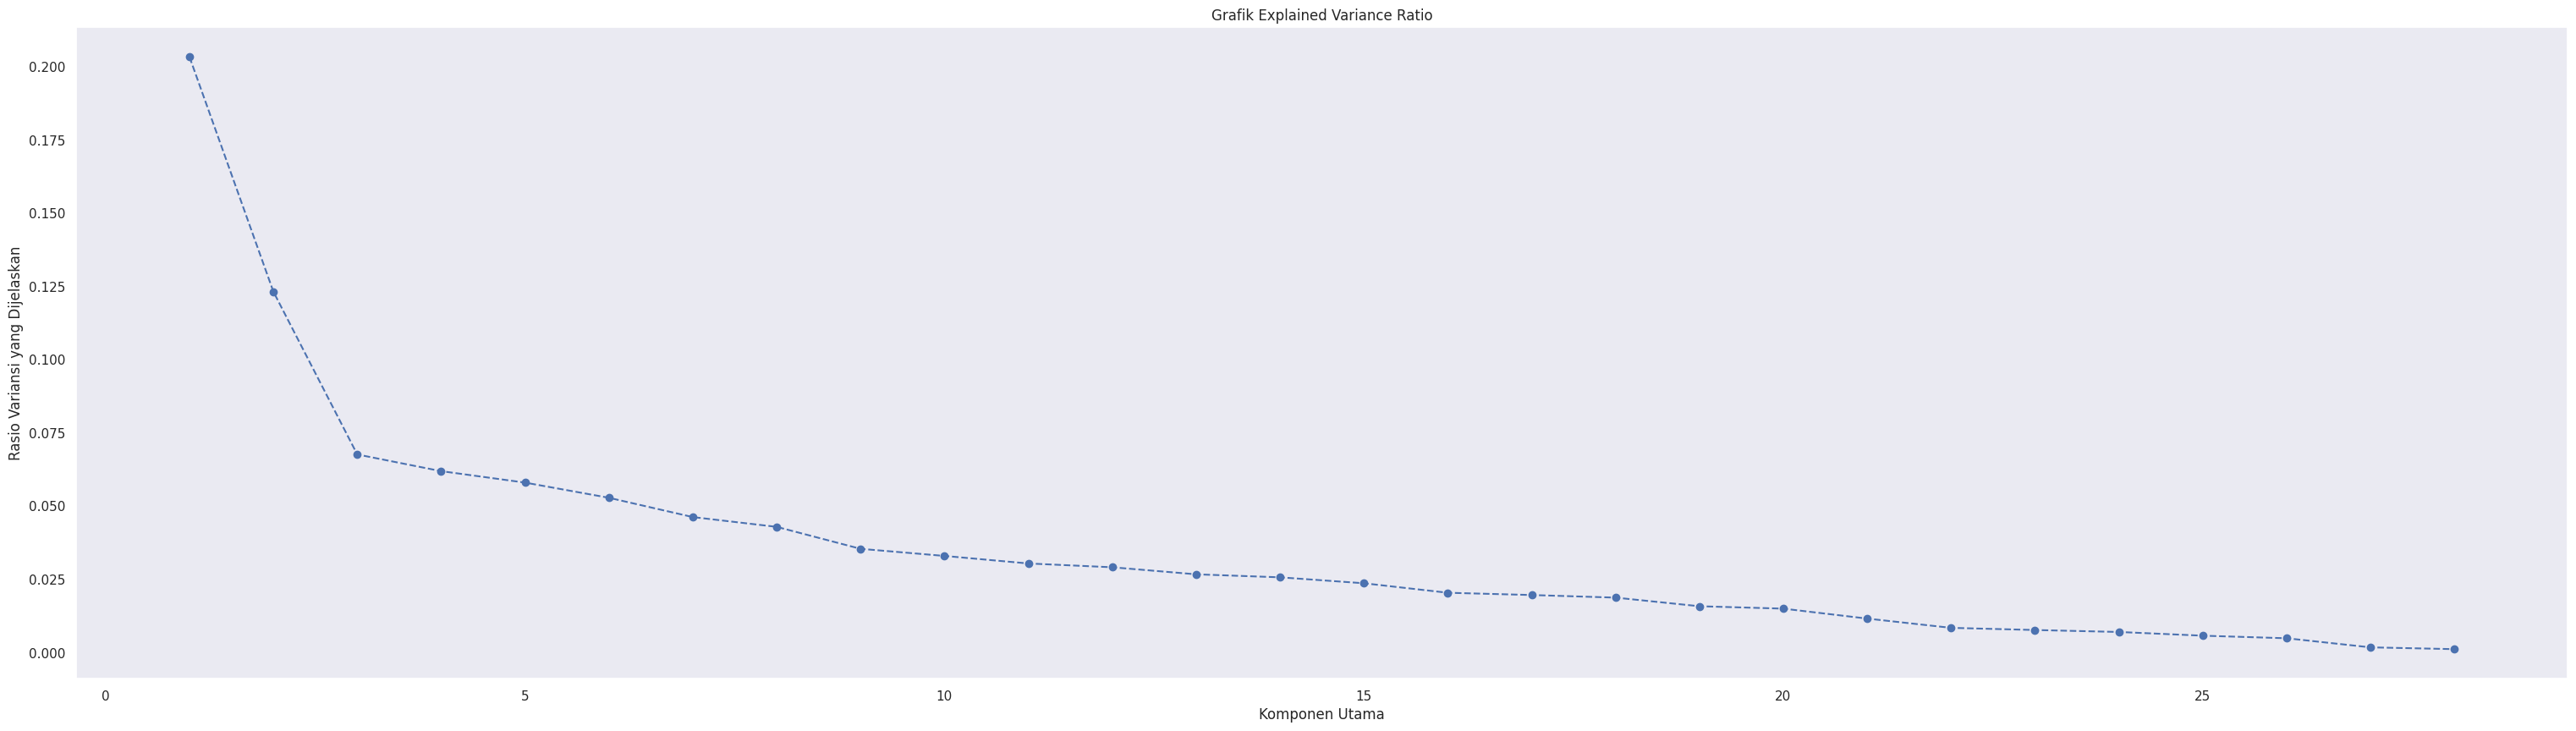

In [168]:
explained_variance_ratio = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Komponen Utama')
plt.ylabel('Rasio Variansi yang Dijelaskan')
plt.title('Grafik Explained Variance Ratio')
plt.grid()
plt.show()

In [169]:
explained_variance_ratio

array([0.20338893, 0.12326481, 0.06769097, 0.06199344, 0.05808649,
       0.0529028 , 0.04631976, 0.04297935, 0.03547904, 0.03305838,
       0.03048398, 0.02918429, 0.02678139, 0.02575345, 0.0237274 ,
       0.02048823, 0.01971281, 0.01882447, 0.01588859, 0.01506292,
       0.01166998, 0.00851056, 0.0077696 , 0.00710194, 0.00583219,
       0.00495371, 0.00185253, 0.00123801])

In [170]:
count = 0
total = 0
while True:
    total += explained_variance_ratio[count]
    count += 1
    if total >=0.95:
        break

print(count)


20


In [171]:
explained_variance_ratio[:20].sum()

0.9510714853490675

In [172]:
pca2 = PCA(n_components=20)
pca2.fit(data_scaled)
transformed_data2 = pca2.transform(data_scaled)

In [173]:
transformed_data2

array([[-5.4409139 , -1.7933779 , -0.57799352, ...,  1.30965312,
         0.91452892,  0.14421877],
       [-3.64785304, -0.51623364, -0.14691104, ...,  0.23365104,
         0.22660498,  0.38731144],
       [-3.30901777,  0.362507  , -0.24652927, ...,  0.73559941,
         0.34915553,  0.04905889],
       ...,
       [ 5.90543254,  2.47796396, -1.25739988, ...,  0.06407152,
        -0.2794851 , -0.38250174],
       [ 0.95111266, -1.94941791,  0.662645  , ..., -0.46784439,
        -1.54812854, -0.05279295],
       [ 0.97421132, -2.29205687, -0.48378384, ..., -0.58838204,
        -0.04420614,  0.28505144]])

In [174]:
data_pca = pd.DataFrame(data=transformed_data2, columns=[f"PCA{i+1}" for i in range(20)])
explained_variance2 = pca2.explained_variance_ratio_

In [175]:
data_pca

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20
0,-5.440914,-1.793378,-0.577994,0.424621,0.374194,-1.107173,-1.339622,0.417394,-0.022577,-0.924308,1.785605,0.235559,-1.584920,-0.098230,0.086471,-1.153405,0.807195,1.309653,0.914529,0.144219
1,-3.647853,-0.516234,-0.146911,1.402390,-0.092917,-2.779489,0.440532,1.857026,0.315874,-1.343179,0.995319,1.391724,0.300919,-1.368662,0.609459,0.844719,-1.015491,0.233651,0.226605,0.387311
2,-3.309018,0.362507,-0.246529,1.883306,-0.873411,-1.851161,0.449896,1.416331,-0.410341,-1.269182,0.459986,0.880424,-0.291378,-0.410571,0.384408,0.768170,-0.952657,0.735599,0.349156,0.049059
3,0.532739,-0.817726,-1.240183,1.077968,-0.098089,0.281951,3.377195,-0.489975,0.727534,-0.010839,-0.075977,-1.088976,-0.001902,0.523936,-0.311062,0.962845,0.271875,-0.088678,-0.797144,-0.498668
4,-2.792290,-0.811190,-0.092752,-0.032732,0.280968,-1.624280,-0.602818,1.752259,0.419326,-0.298348,-1.025494,-0.298969,0.767627,0.052784,-0.114174,0.363816,0.247222,-0.522444,-0.864014,0.424229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2836,0.912924,-0.215555,1.439879,0.295832,-1.180366,-0.657165,1.947800,-0.387638,-0.837605,2.351249,-0.113233,0.202218,0.233615,-0.140369,0.086254,-1.320578,1.135772,-0.686384,-0.092596,-0.128957
2837,2.442420,-2.359922,1.568521,-1.136904,0.441331,-0.957859,0.721148,0.702202,0.264289,0.207735,-0.210143,1.355362,0.121554,0.145471,0.354002,0.198990,-0.378652,-0.349763,-0.644946,0.296746
2838,5.905433,2.477964,-1.257400,2.137367,-0.027108,2.216096,-1.481643,5.071214,-0.286188,0.415072,2.336974,1.415990,0.578424,0.841478,-1.293592,-0.659447,-0.464306,0.064072,-0.279485,-0.382502
2839,0.951113,-1.949418,0.662645,-0.297322,0.210197,-0.100211,0.005519,-0.347258,-1.328559,0.928288,0.416698,1.088488,-1.029960,-0.051185,-0.195827,0.903544,-0.209134,-0.467844,-1.548129,-0.052793


In [176]:
data_pca["Target"] = target 

In [177]:
data_pca

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20,Target
0,-5.440914,-1.793378,-0.577994,0.424621,0.374194,-1.107173,-1.339622,0.417394,-0.022577,-0.924308,...,0.235559,-1.584920,-0.098230,0.086471,-1.153405,0.807195,1.309653,0.914529,0.144219,Dropout
1,-3.647853,-0.516234,-0.146911,1.402390,-0.092917,-2.779489,0.440532,1.857026,0.315874,-1.343179,...,1.391724,0.300919,-1.368662,0.609459,0.844719,-1.015491,0.233651,0.226605,0.387311,Dropout
2,-3.309018,0.362507,-0.246529,1.883306,-0.873411,-1.851161,0.449896,1.416331,-0.410341,-1.269182,...,0.880424,-0.291378,-0.410571,0.384408,0.768170,-0.952657,0.735599,0.349156,0.049059,Dropout
3,0.532739,-0.817726,-1.240183,1.077968,-0.098089,0.281951,3.377195,-0.489975,0.727534,-0.010839,...,-1.088976,-0.001902,0.523936,-0.311062,0.962845,0.271875,-0.088678,-0.797144,-0.498668,Dropout
4,-2.792290,-0.811190,-0.092752,-0.032732,0.280968,-1.624280,-0.602818,1.752259,0.419326,-0.298348,...,-0.298969,0.767627,0.052784,-0.114174,0.363816,0.247222,-0.522444,-0.864014,0.424229,Dropout
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2836,0.912924,-0.215555,1.439879,0.295832,-1.180366,-0.657165,1.947800,-0.387638,-0.837605,2.351249,...,0.202218,0.233615,-0.140369,0.086254,-1.320578,1.135772,-0.686384,-0.092596,-0.128957,Graduate
2837,2.442420,-2.359922,1.568521,-1.136904,0.441331,-0.957859,0.721148,0.702202,0.264289,0.207735,...,1.355362,0.121554,0.145471,0.354002,0.198990,-0.378652,-0.349763,-0.644946,0.296746,Graduate
2838,5.905433,2.477964,-1.257400,2.137367,-0.027108,2.216096,-1.481643,5.071214,-0.286188,0.415072,...,1.415990,0.578424,0.841478,-1.293592,-0.659447,-0.464306,0.064072,-0.279485,-0.382502,Graduate
2839,0.951113,-1.949418,0.662645,-0.297322,0.210197,-0.100211,0.005519,-0.347258,-1.328559,0.928288,...,1.088488,-1.029960,-0.051185,-0.195827,0.903544,-0.209134,-0.467844,-1.548129,-0.052793,Graduate


In [178]:
data_pca.to_csv('data_eda.csv',index=False)

In [49]:
from sklearn.model_selection import train_test_split
import pandas as pd
datas = pd.read_csv('data_eda.csv')
x = datas[datas.columns[:-1]]
y = datas[datas.columns[-1]]
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y,random_state=2)

In [50]:
import numpy as np
x_train = np.asarray(x_train)


In [51]:
len(x_train[0])

18

In [52]:
datas["Target"].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [179]:
pca3 = PCA(n_components=18)
pca3.fit(data_norm)
transformed_data3 = pca3.transform(data_norm)

In [180]:
data_pca_norm = pd.DataFrame(data=transformed_data3, columns=[f"PCA{i+1}" for i in range(18)])
data_pca_norm["Target"] = target 
data_pca_norm.to_csv('data_eda_norm.csv',index=False)